In [2]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
from typing import Dict, Any

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 250

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')
from experiments.notebooks import viz

def get_comparison_result(path: str, estimator_name: str, test=False) -> Dict[str, Any]:
    if test:
        result_file = path + 'test/' + f'{estimator_name}_test_comparisons.pkl'
    else:
        result_file = path + 'val/' + f'{estimator_name}_comparisons.pkl'
    return pkl.load(open(result_file, 'rb'))    
    
MODEL_COMPARISON_PATH = 'experiments/comparison_data/'

datasets = [
        ("breast-cancer", 13),
        ("breast-w", 15),
        ("credit-g", 31),
        ("haberman", 43),
        ("heart", 1574),
        ("labor", 4),
        ("vote", 56),
    ]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# complexity vs. ROC Area plot for all models

In [ ]:
test_models = [
    'random_forest', 
    'gradient_boosting', 
    'skope_rules', 
    'rulefit', 
    'fplasso', 
    'fpskope',
    'brl',
    'grl',
    'oner',
    'brs',
    'stbl_l2_mm0',
    'stbl_l2_mm1', 
    'stbl_l2_mm2']
test_results = [get_comparison_result(MODEL_COMPARISON_PATH, mname, test=True)
                for mname in test_models]
viz.viz_comparison_test_average(test_results)
plt.show()

**check individual datasets**

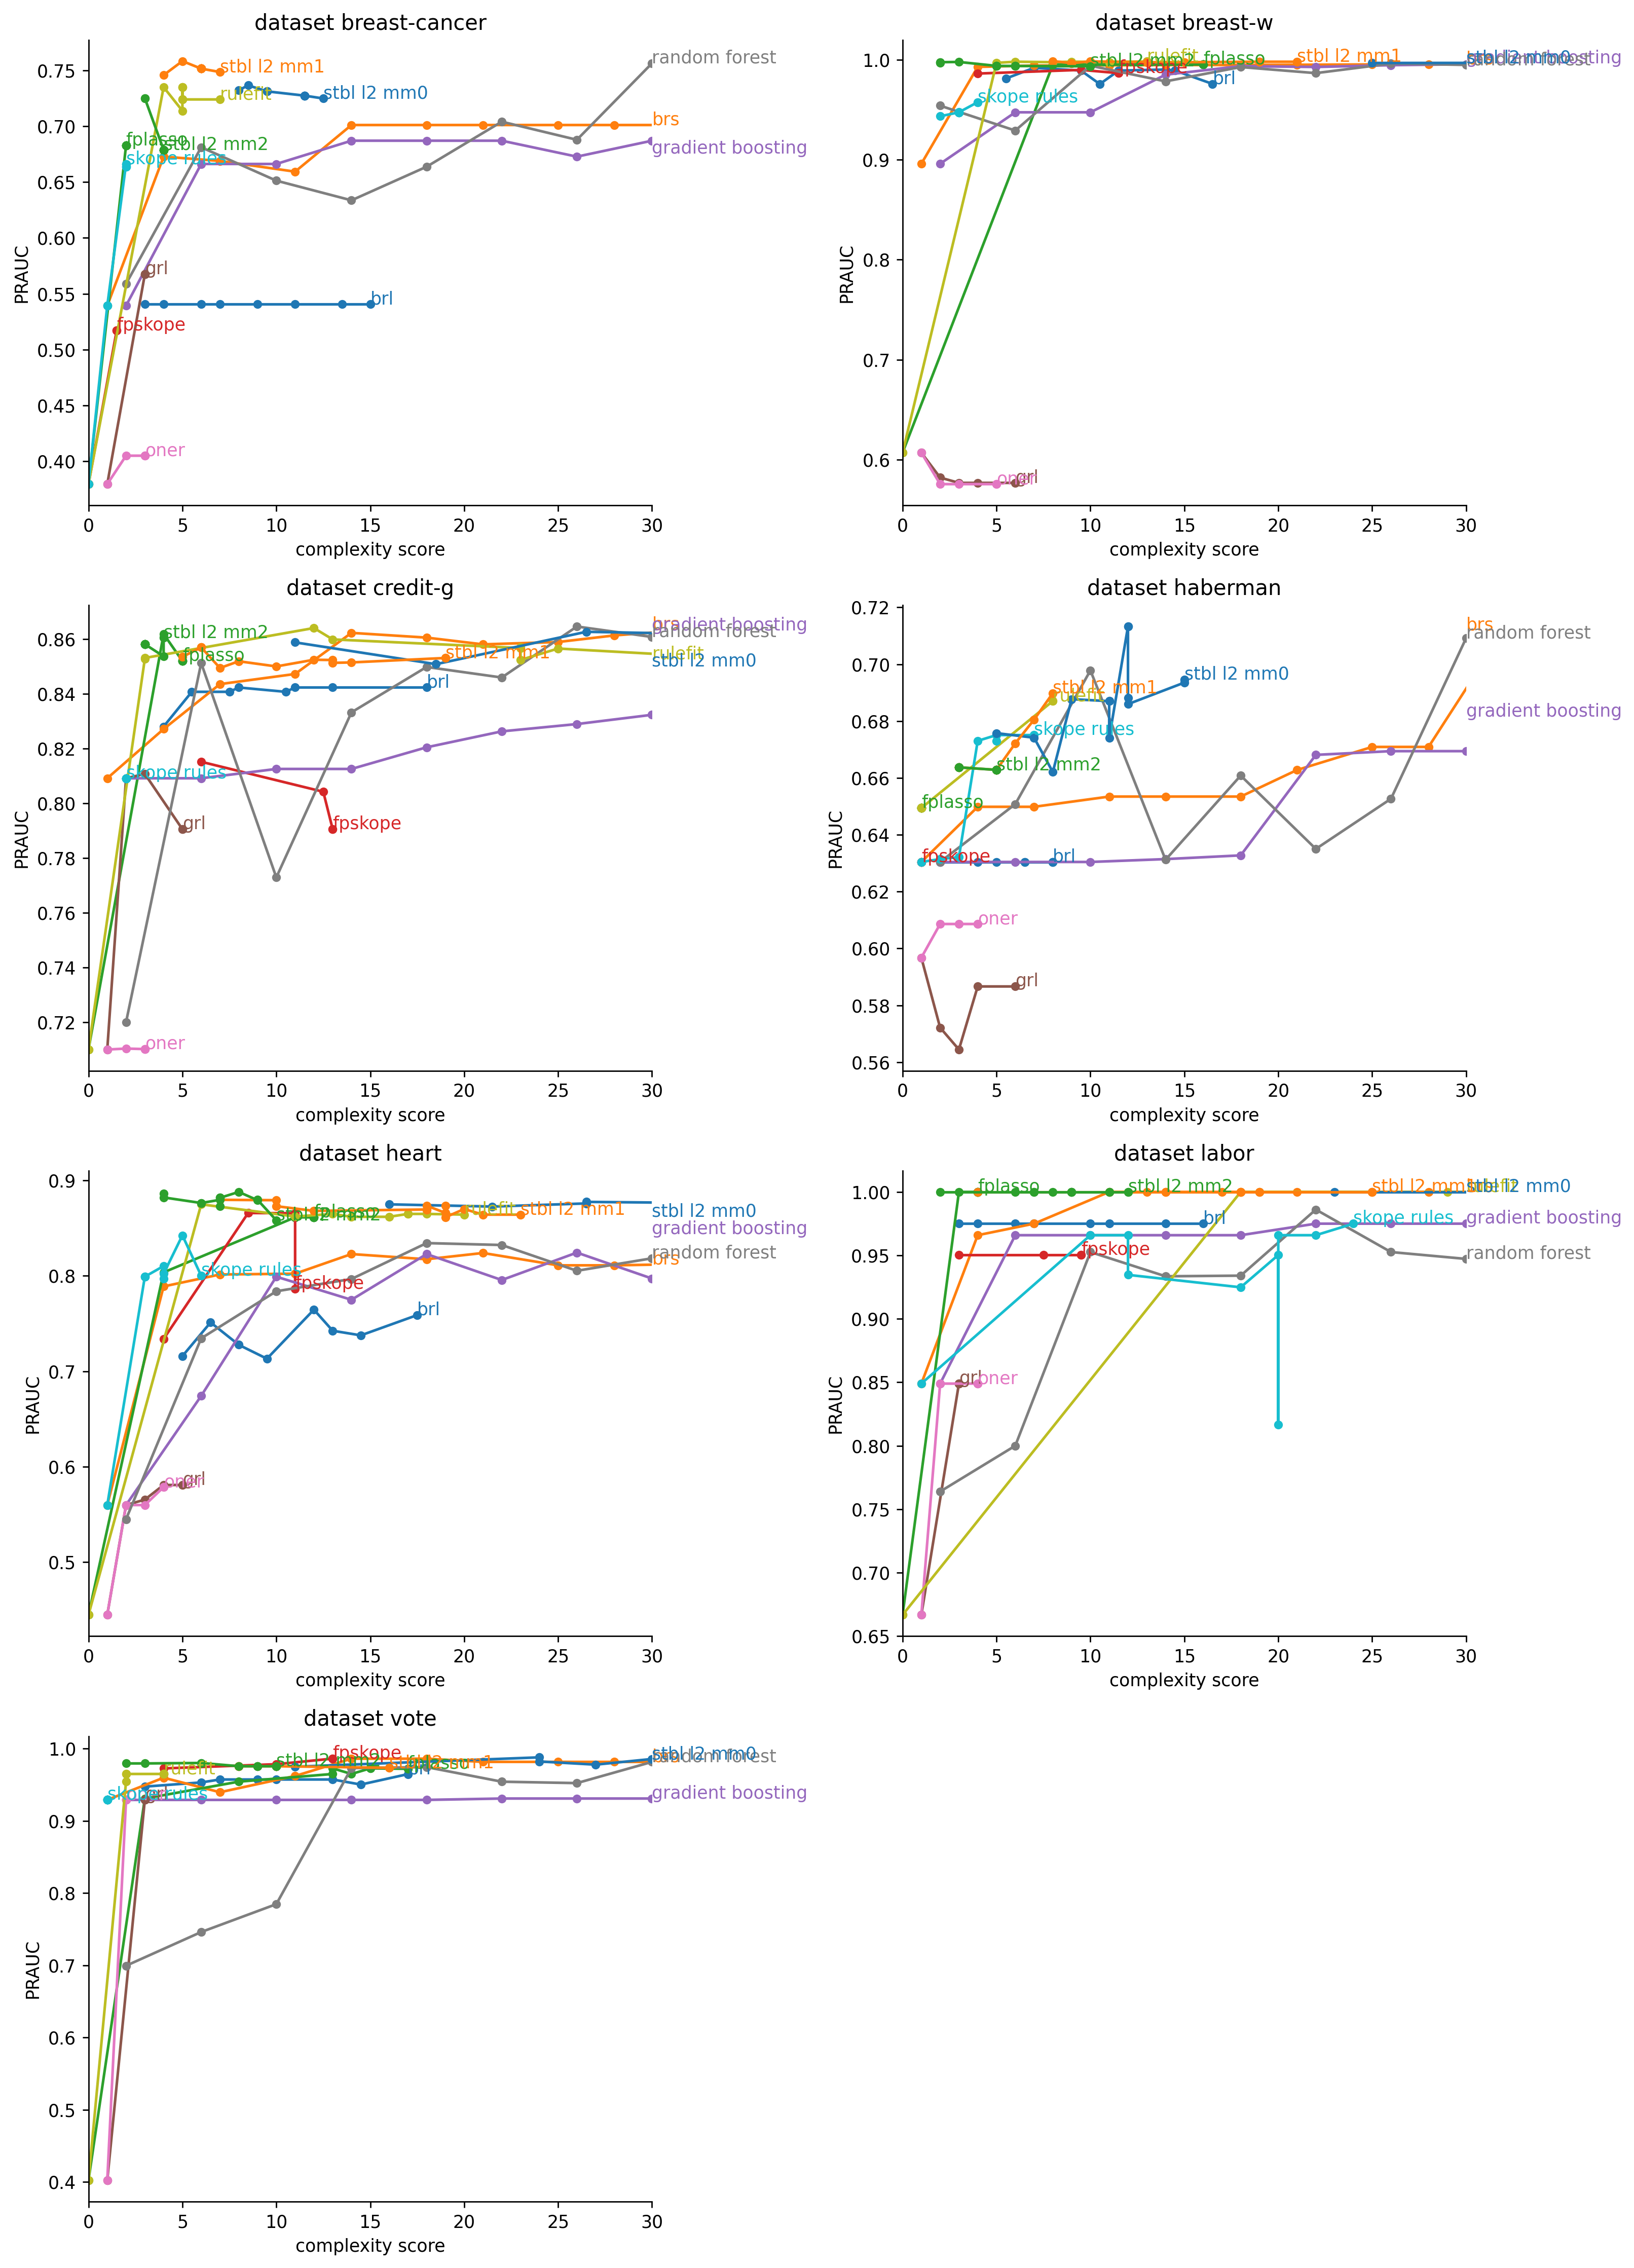

In [4]:
viz.viz_comparison_datasets(test_results, cols=2, figsize=(13, 18), test=True)
plt.show()

# check each model

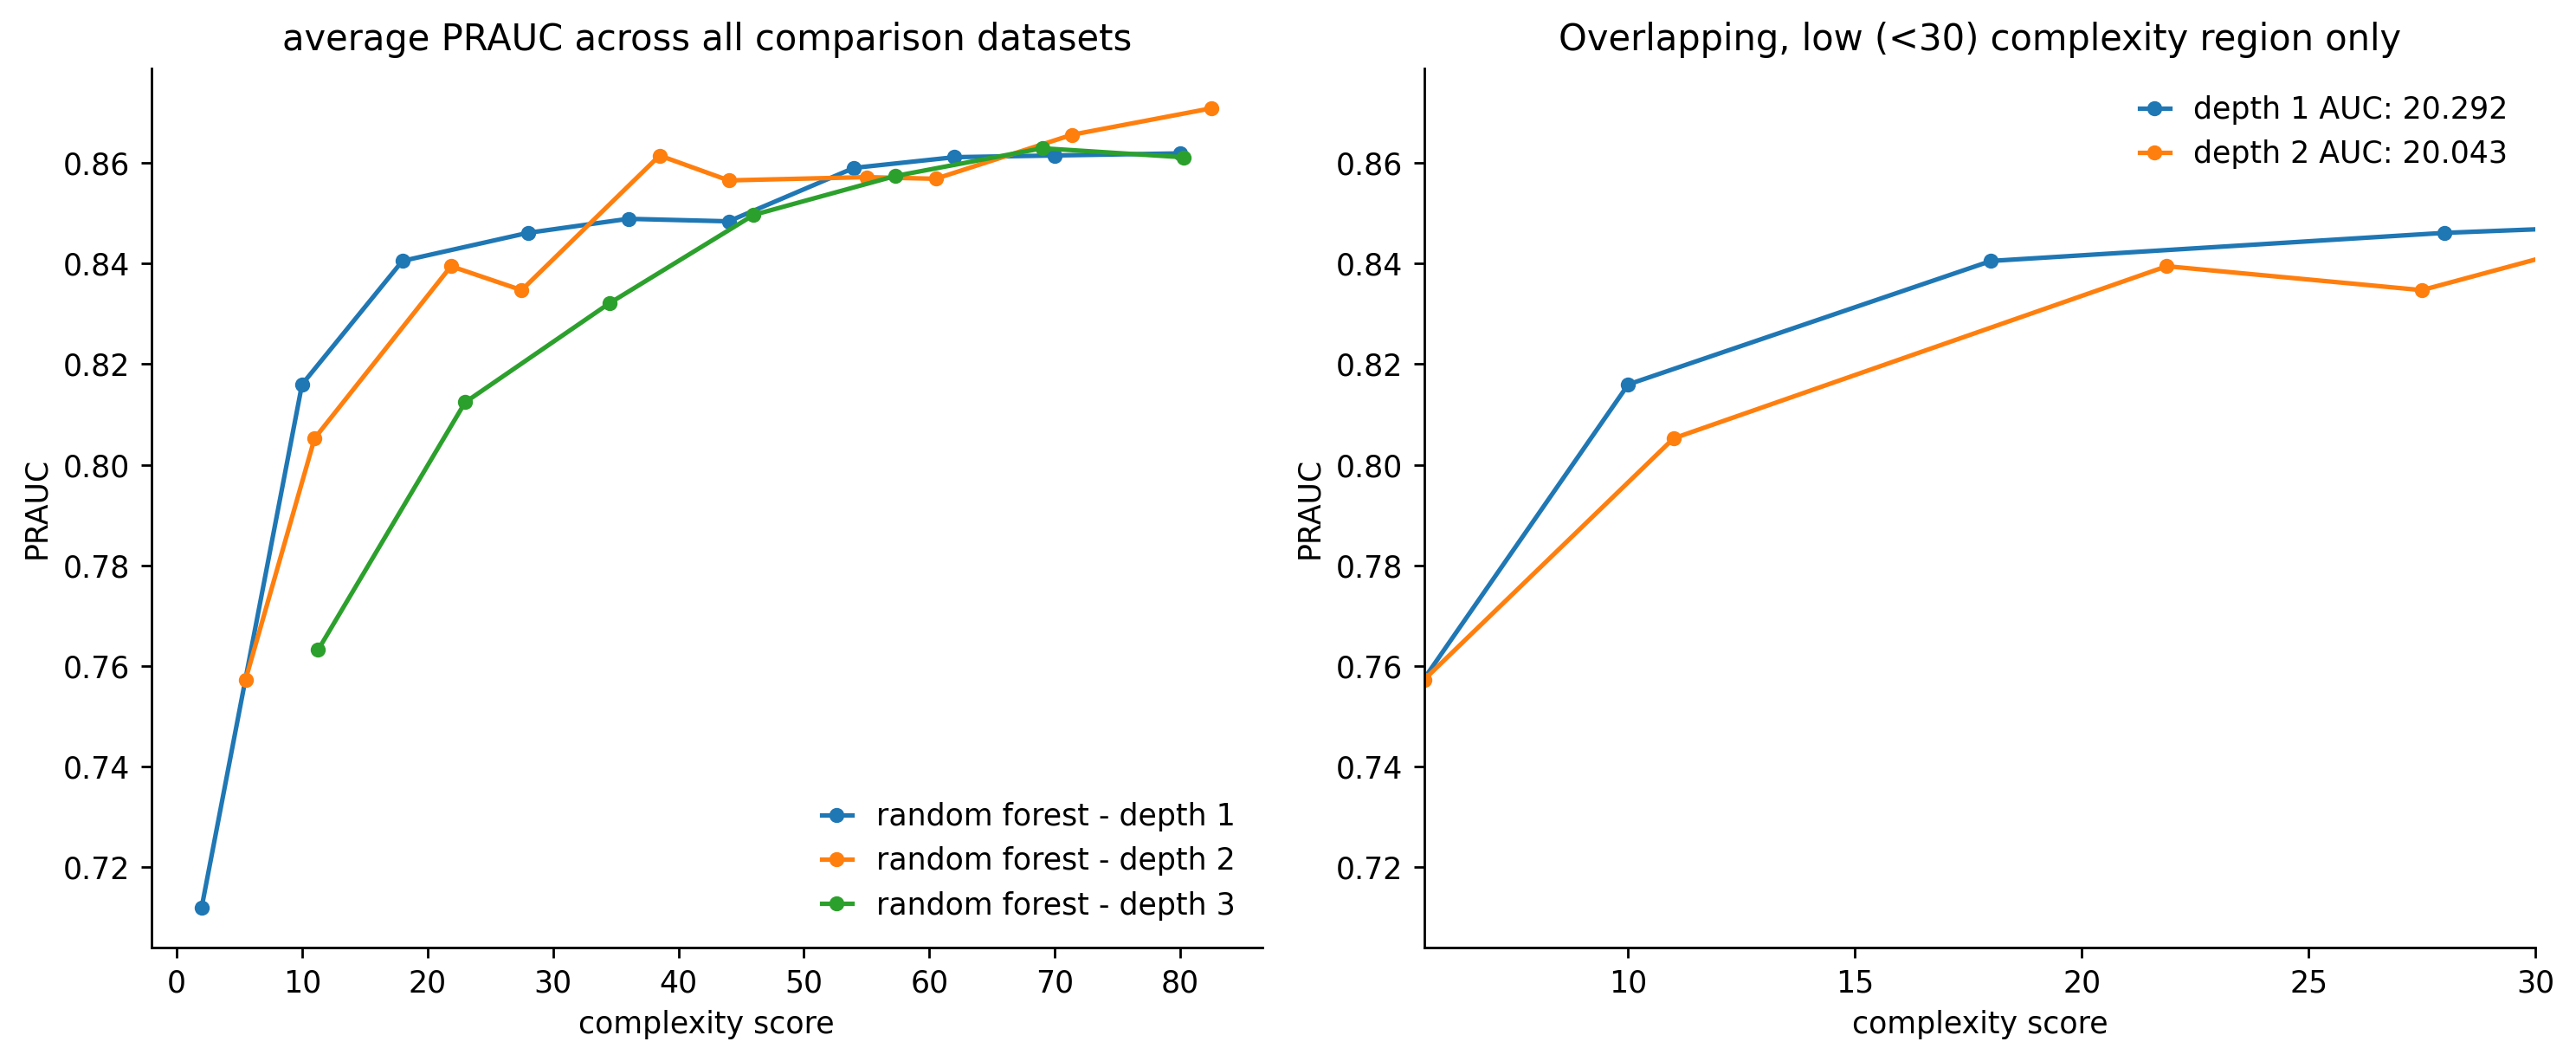

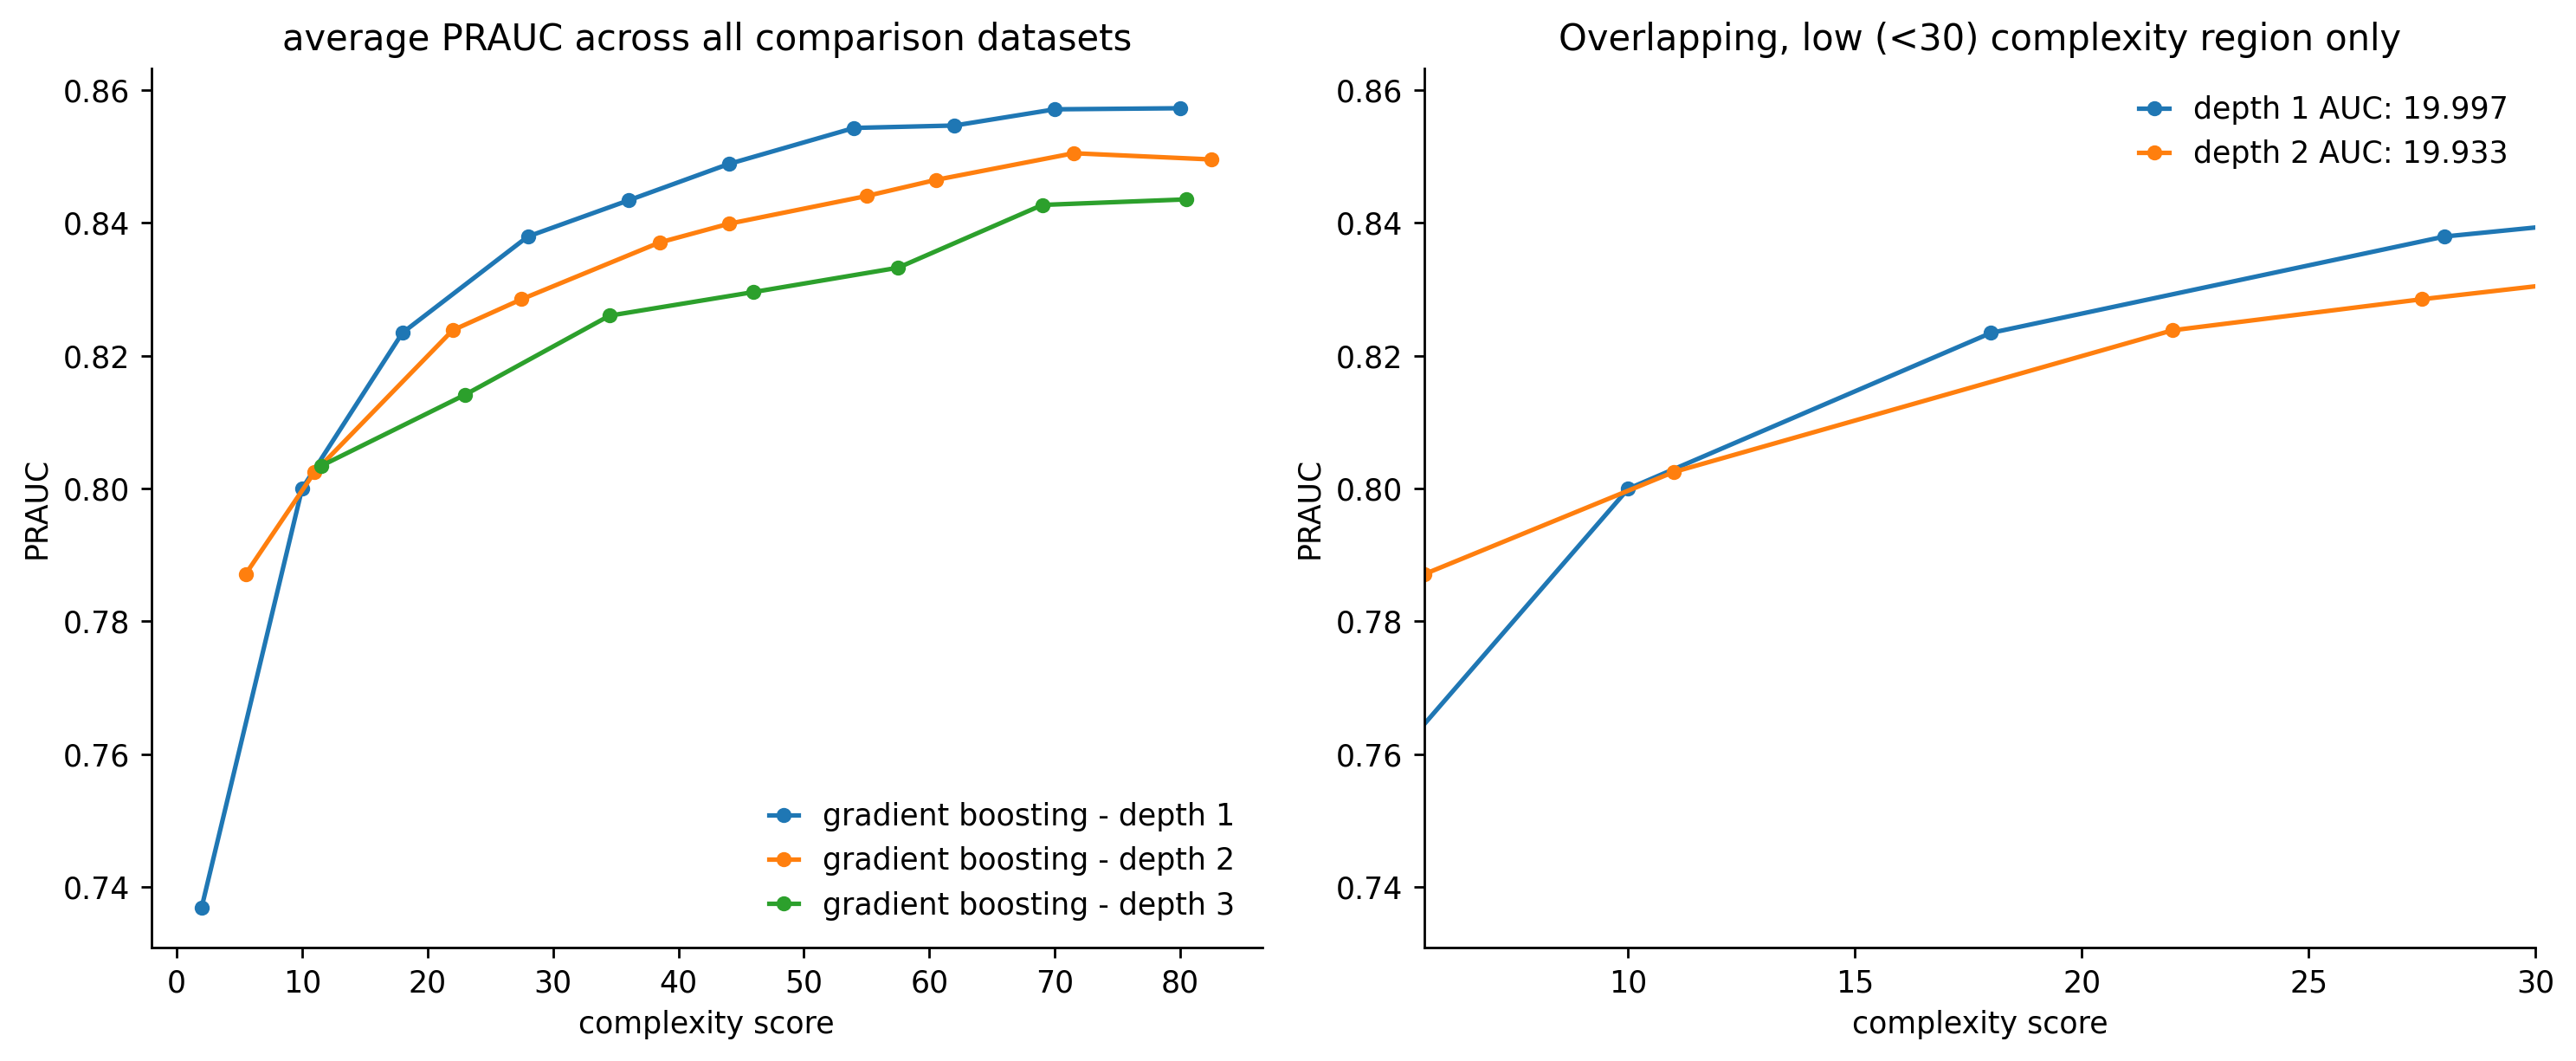

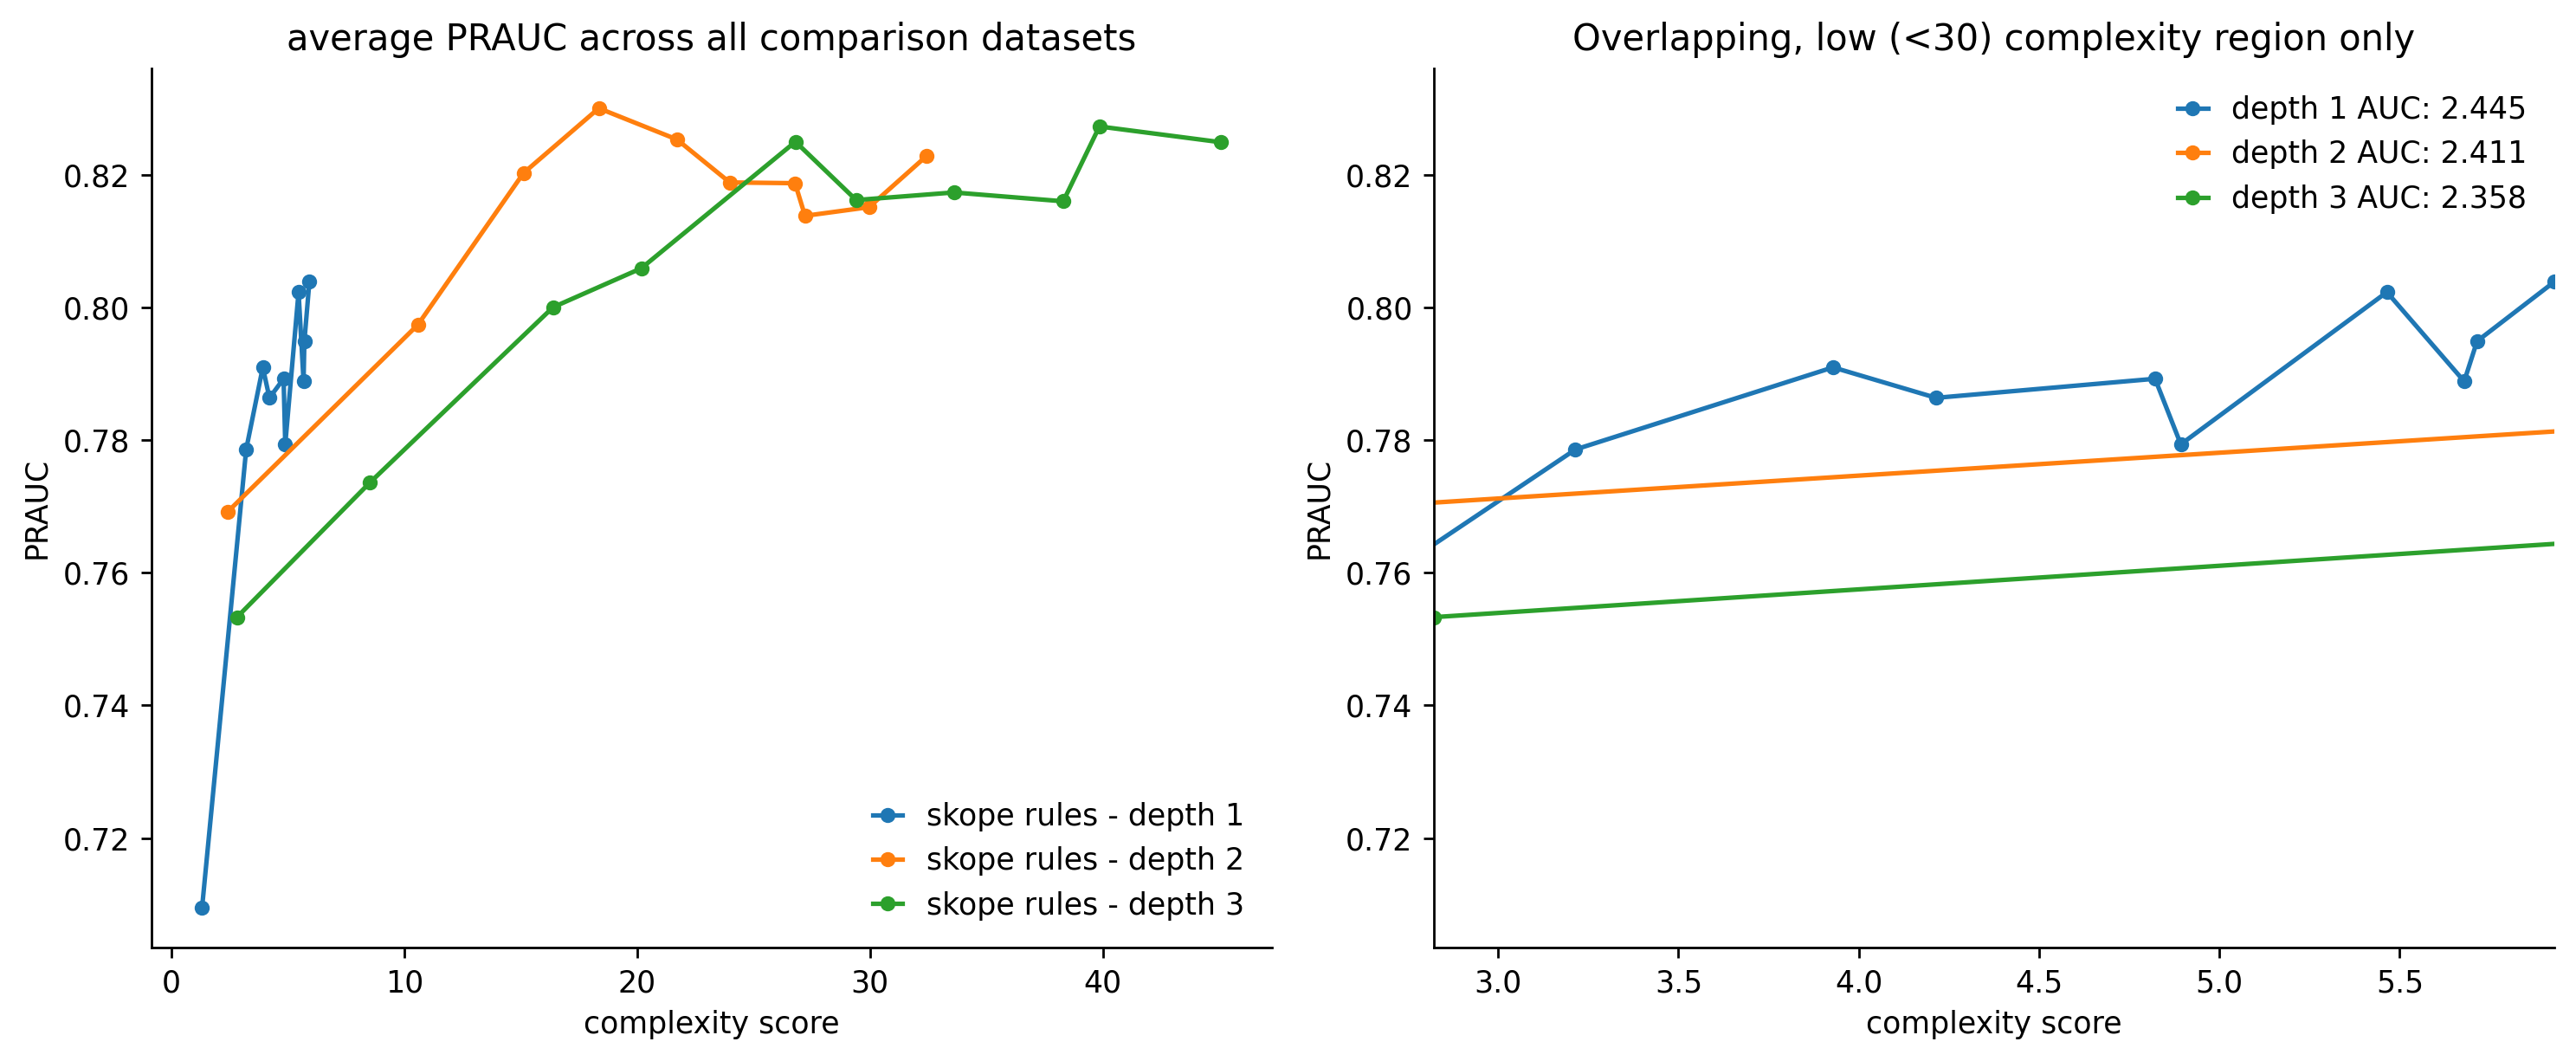

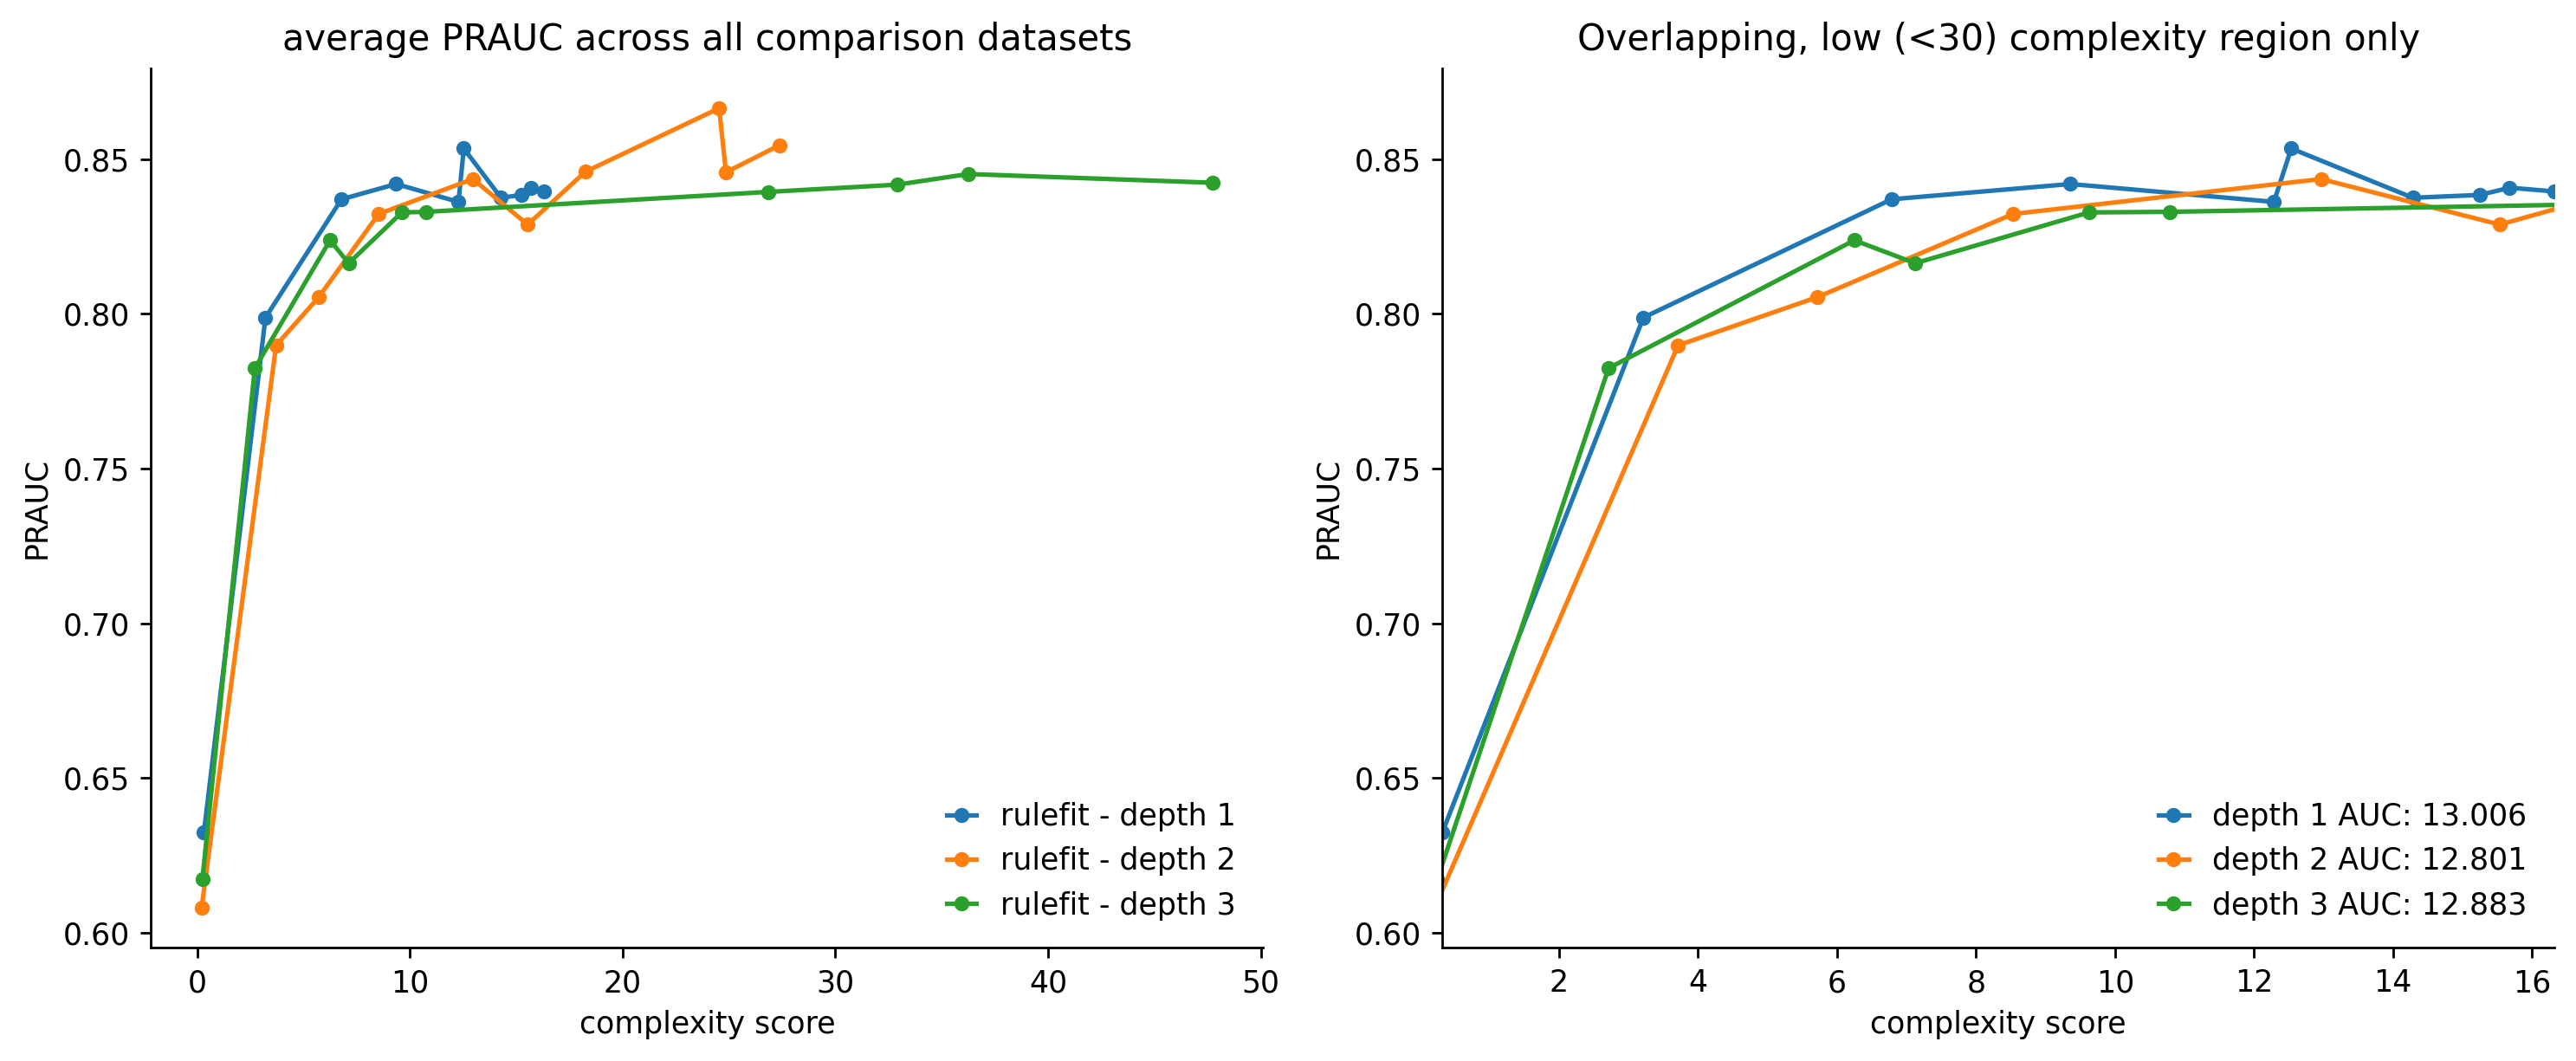

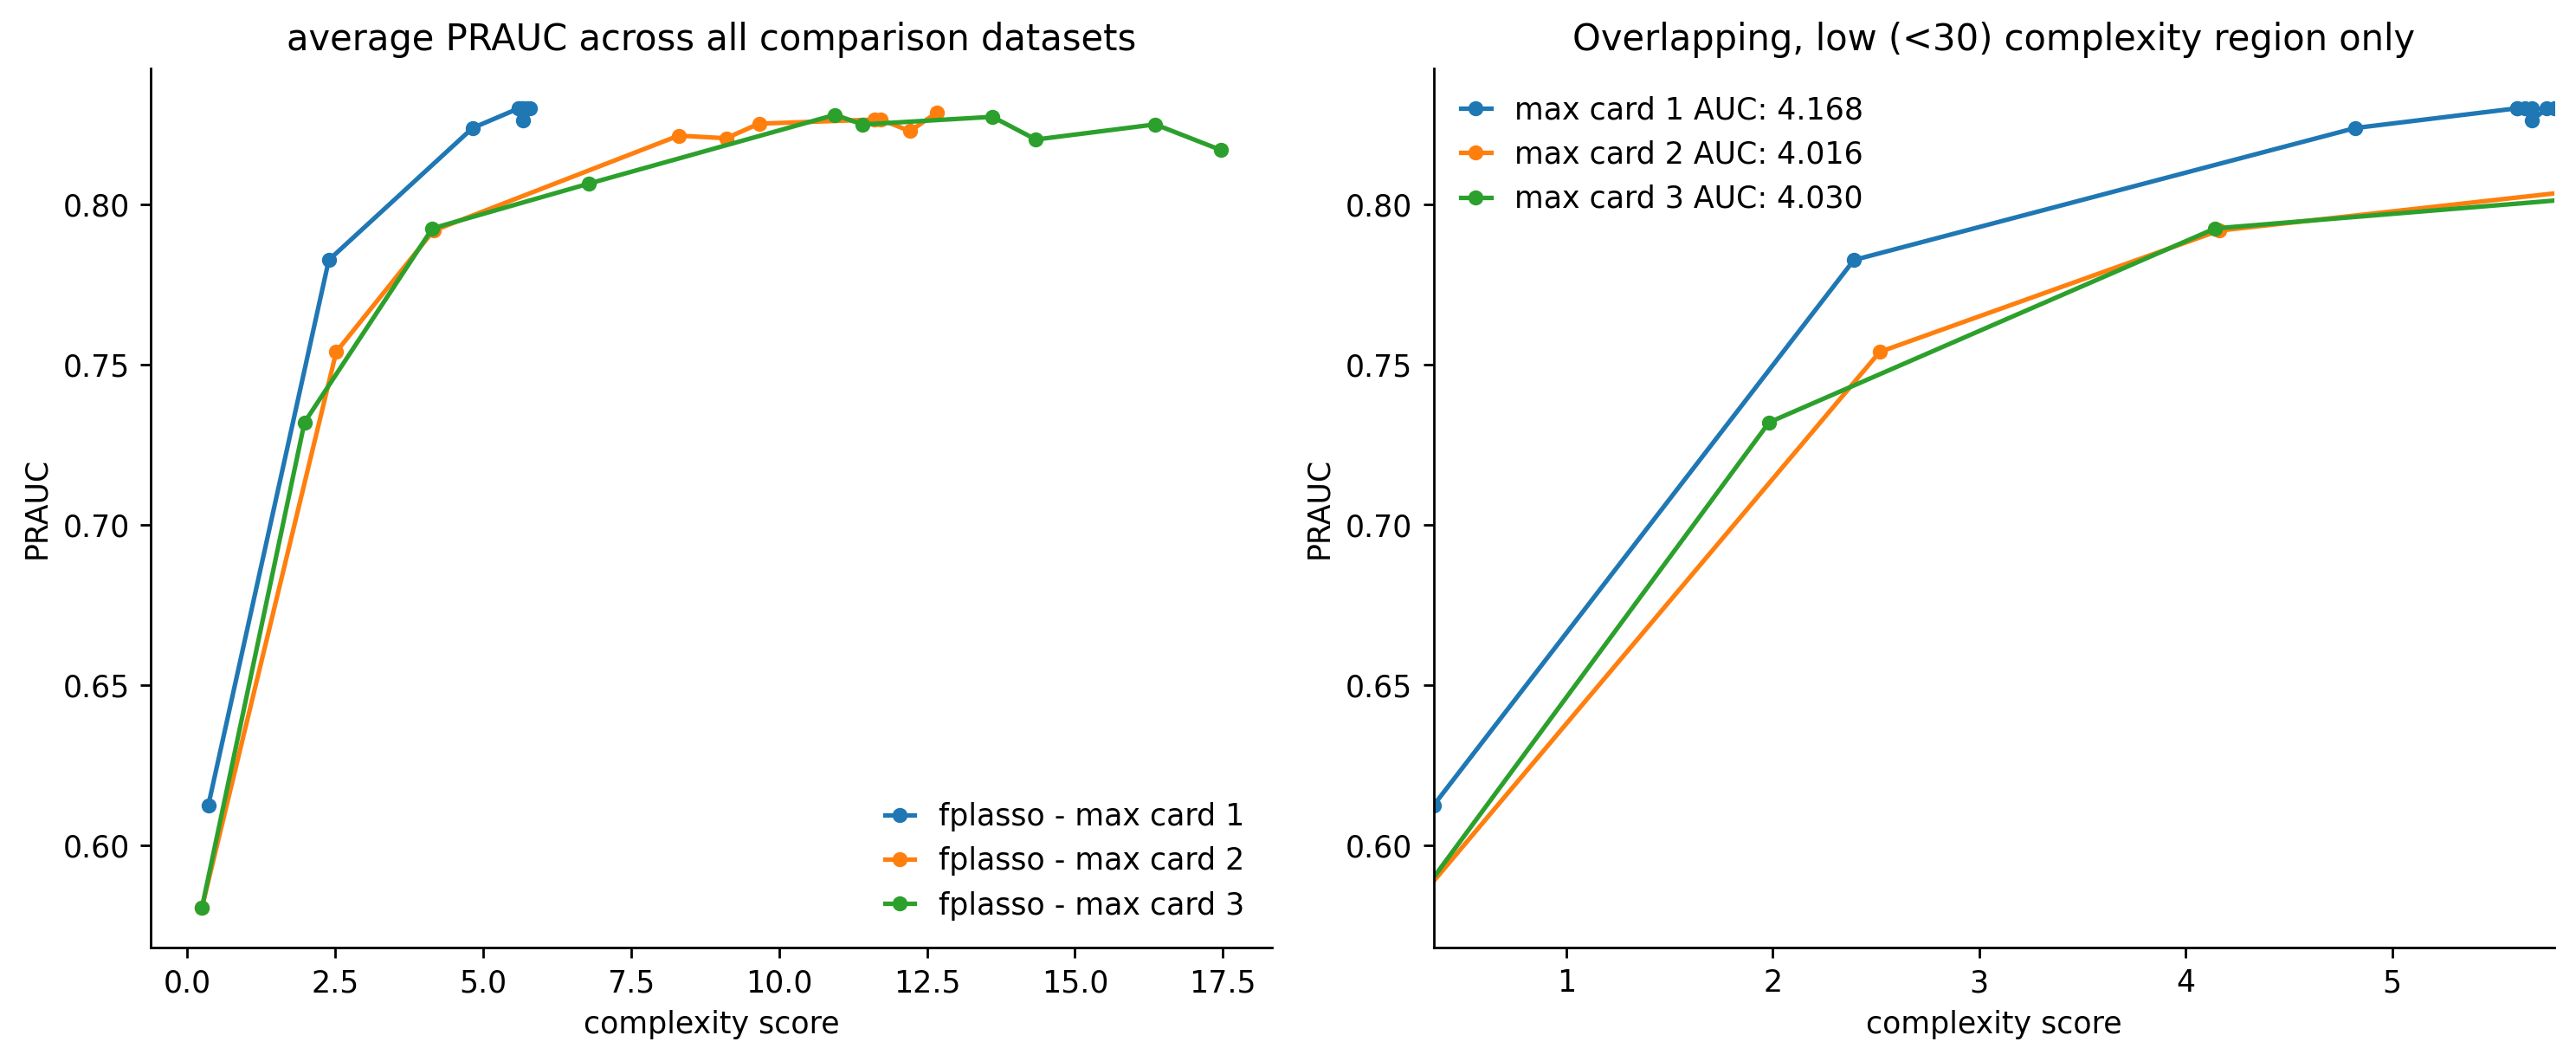

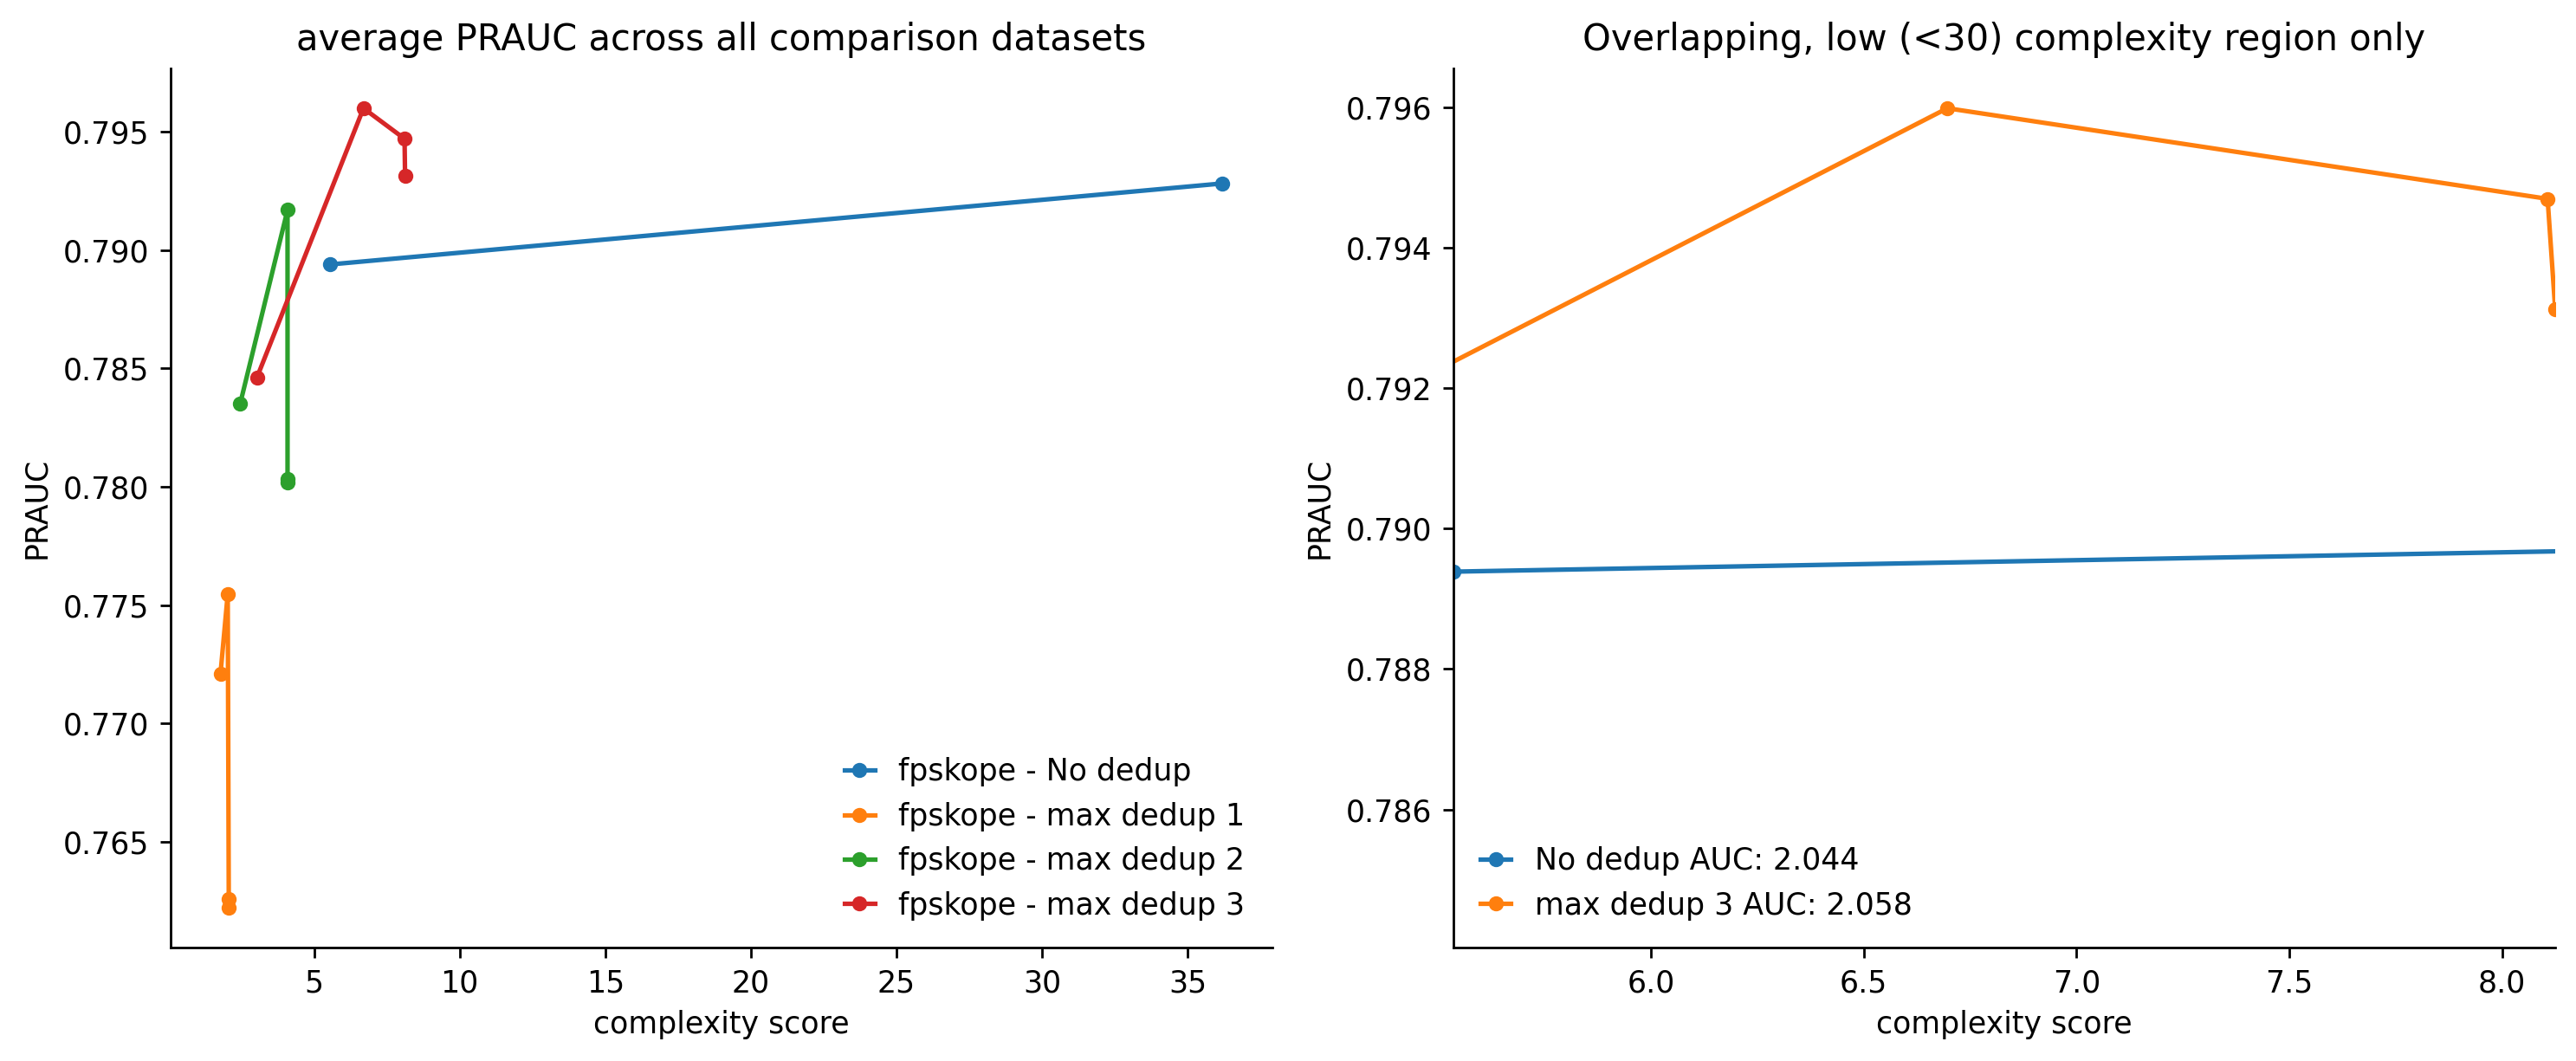

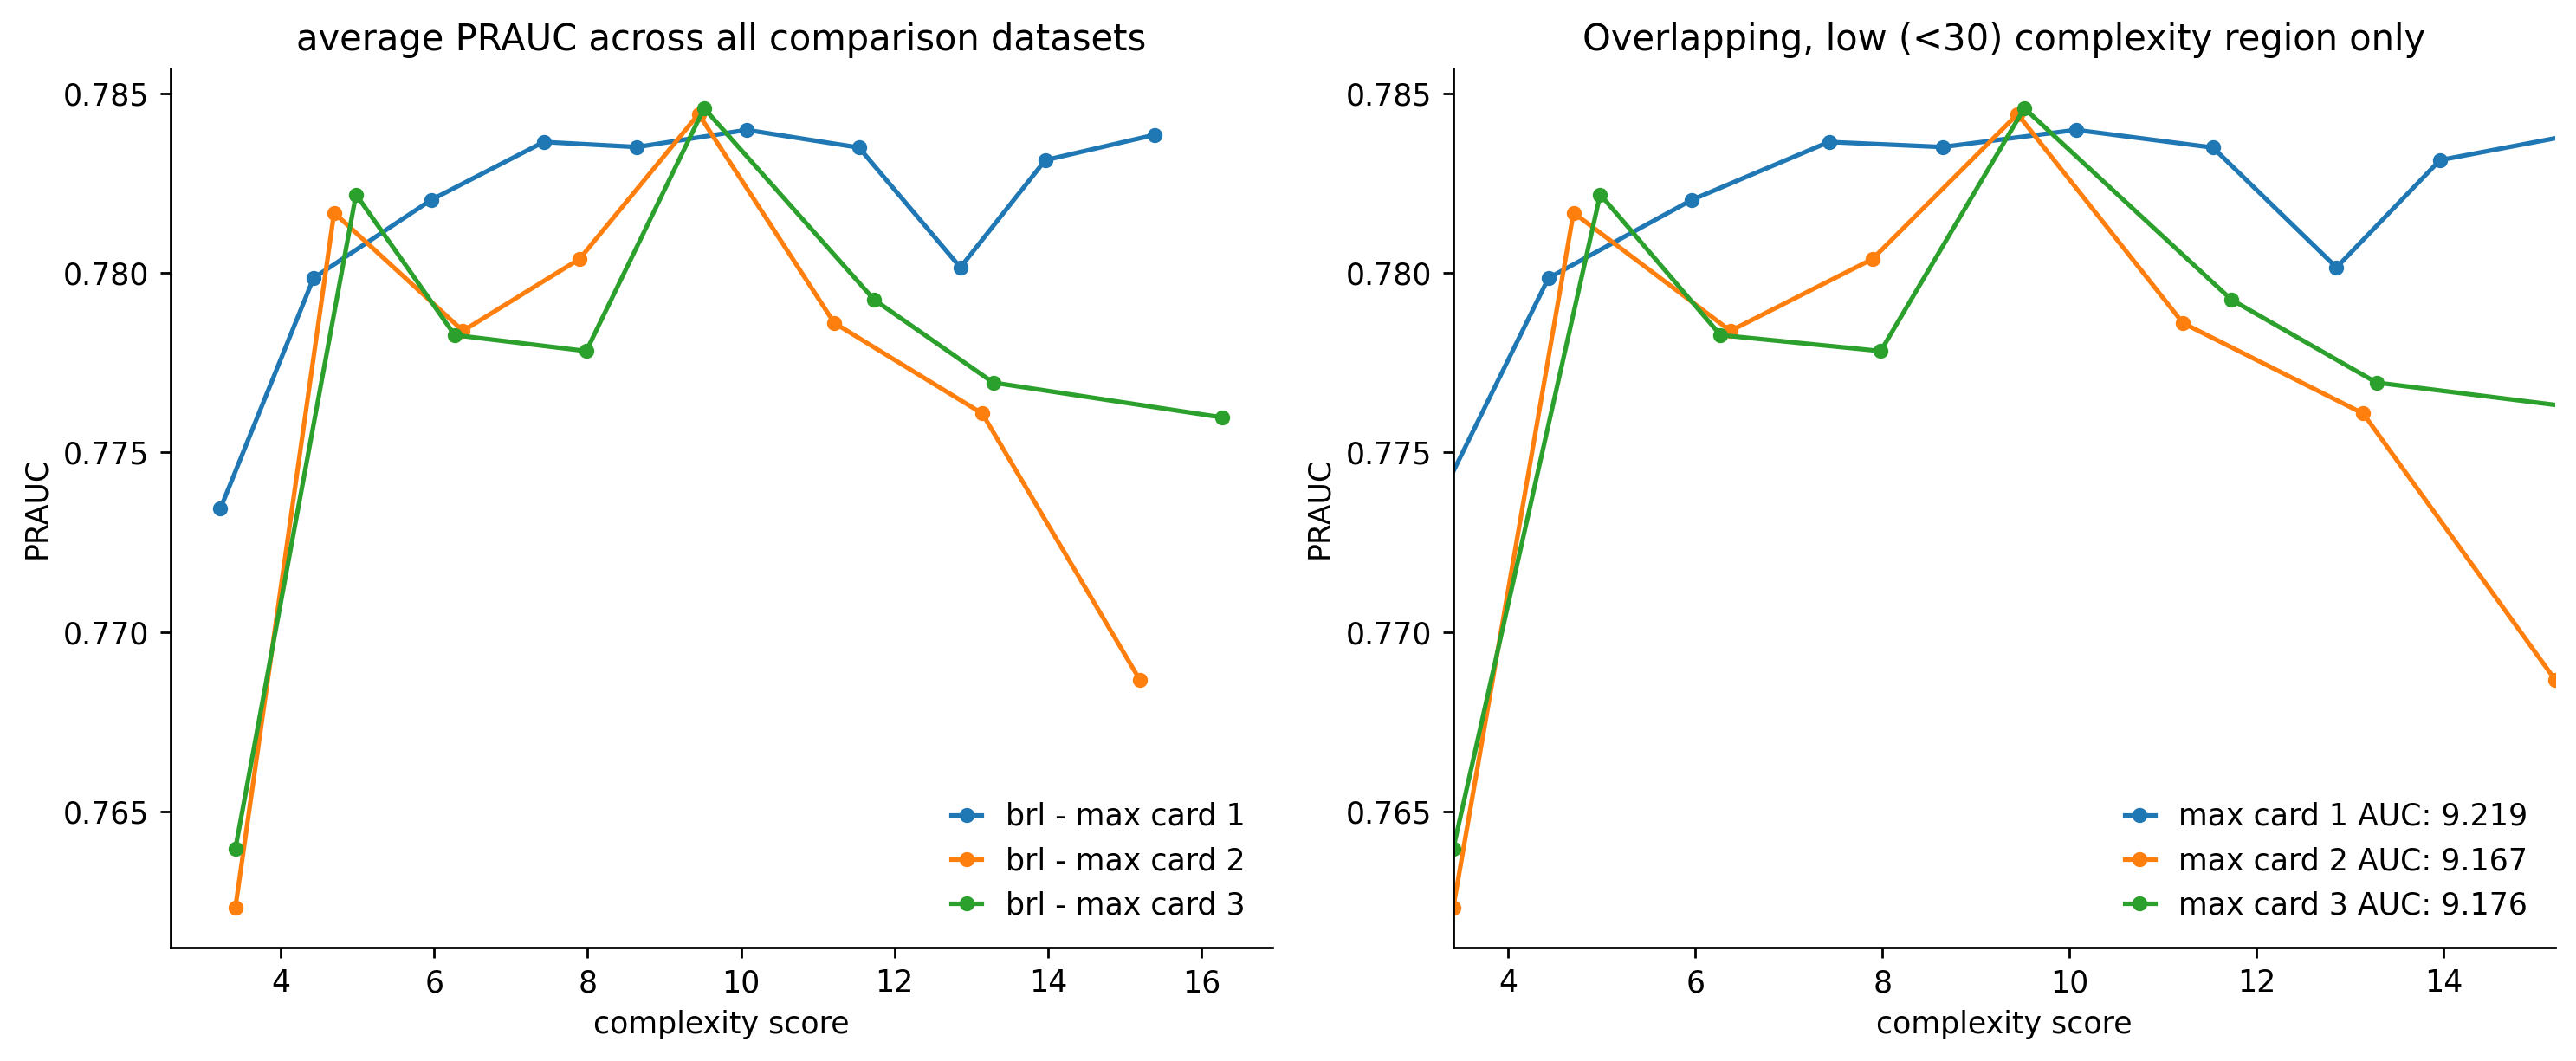

In [5]:
for model_name in ['random_forest', 'gradient_boosting', 'skope_rules', 
              'rulefit', 'fplasso', 'fpskope', 'brl']:
    comparison_result = get_comparison_result(MODEL_COMPARISON_PATH, model_name)
    viz.viz_comparison_val_average(comparison_result)
    plt.show()

In [6]:
df = get_comparison_result(MODEL_COMPARISON_PATH, 'brl', True)['df']
df.loc[:, ['time' in c for c in df.columns]]

,breast-cancer_time,breast-w_time,credit-g_time,haberman_time,heart_time,labor_time,vote_time,mean_time
brl,35.705261,66.526978,77.896650,24.148177,57.405335,38.048647,45.205172,49.276603
brl,59.484811,109.739594,107.010038,30.196455,65.609927,32.725347,42.267392,63.861938
brl,83.616442,134.007414,130.247038,42.887434,105.280731,78.339846,98.169155,96.078294
brl,104.536468,159.315089,150.251667,57.992594,123.763569,90.546206,79.428843,109.404920
brl,116.968006,170.888205,166.523305,64.355023,137.421382,110.092119,136.928703,129.025249
brl,133.410757,189.063645,179.538275,77.128059,152.401061,123.074406,110.916811,137.933288
brl,142.297274,203.900568,193.814018,83.408127,167.108275,137.170531,168.938496,156.662470
brl,154.268437,229.431087,216.615412,89.240689,185.960529,152.995373,192.111966,174.374785
